<a href="https://colab.research.google.com/github/sockthem/sockthem/blob/main/Hackathon_Notebook_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Stock Market Analysis and Prediction

## Stock Market Data From Google Finance

### Introduction

   Stock Market Analysis and Prediction is the project on technical analysis, visualization and prediction using data provided by Google Finance. By looking at data from the stock market, particularly some giant technology stocks and others. Used pandas to get stock information, visualize different aspects of it, and finally looked at a few ways of analyzing the risk of a stock, based on its previous performance history. Predicted future stock prices through a Monte Carlo method!
   
### Questions

In this analysis, I would like to explore the following questions.

1. What was the change in price of the stock over time?
2. What was the daily return of the stock on average?
3. What was the moving average of the various stocks?
4. What was the correlation between different stocks' closing prices?
4. What was the correlation between different stocks' daily returns?
5. How much value do we put at risk by investing in a particular stock?
6. How can we attempt to predict future stock behavior?

In [ ]:
# For Data Processing
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('figure', figsize=(20, 10))
sns.set_style('whitegrid')
%matplotlib inline
import ipywidgets as widgets
from IPython.display import display, clear_output

In [ ]:
import pandas as pd

url="https://raw.githubusercontent.com/jpsiyyadri/stocks_data/main/stocks_apple_amazon_google.csv"
c=pd.read_csv(url)

In [ ]:
c.head(10)

,Attributes,Adj Close,Adj Close.1,Adj Close.2,Close,Close.1,Close.2,High,High.1,High.2,Low,Low.1,Low.2,Open,Open.1,Open.2,Volume,Volume.1,Volume.2
0,Symbols,AAPL,AMZN,GOOGL,AAPL,AMZN,GOOGL,AAPL,AMZN,GOOGL,AAPL,AMZN,GOOGL,AAPL,AMZN,GOOGL,AAPL,AMZN,GOOGL
1,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1980-12-12,0.10045342892408371,NaN,NaN,0.1283479928970337,NaN,NaN,0.1289059966802597,NaN,NaN,0.1283479928970337,NaN,NaN,0.1283479928970337,NaN,NaN,469033600.0,NaN,NaN
3,1980-12-15,0.09521274268627167,NaN,NaN,0.12165199965238571,NaN,NaN,0.12221000343561172,NaN,NaN,0.12165199965238571,NaN,NaN,0.12221000343561172,NaN,NaN,175884800.0,NaN,NaN
4,1980-12-16,0.08822432905435562,NaN,NaN,0.11272300034761429,NaN,NaN,0.1132809966802597,NaN,NaN,0.11272300034761429,NaN,NaN,0.1132809966802597,NaN,NaN,105728000.0,NaN,NaN
5,1980-12-17,0.09040795266628265,NaN,NaN,0.11551299691200256,NaN,NaN,0.11607100069522858,NaN,NaN,0.11551299691200256,NaN,NaN,0.11551299691200256,NaN,NaN,86441600.0,NaN,NaN
6,1980-12-18,0.09302909672260284,NaN,NaN,0.11886200308799744,NaN,NaN,0.11941999942064285,NaN,NaN,0.11886200308799744,NaN,NaN,0.11886200308799744,NaN,NaN,73449600.0,NaN,NaN
7,1980-12-19,0.09870653599500656,NaN,NaN,0.12611599266529083,NaN,NaN,0.12667399644851685,NaN,NaN,0.12611599266529083,NaN,NaN,0.12611599266529083,NaN,NaN,48630400.0,NaN,NaN
8,1980-12-22,0.1035105437040329,NaN,NaN,0.1322540044784546,NaN,NaN,0.1328130066394806,NaN,NaN,0.1322540044784546,NaN,NaN,0.1322540044784546,NaN,NaN,37363200.0,NaN,NaN
9,1980-12-23,0.10787858814001083,NaN,NaN,0.13783499598503113,NaN,NaN,0.13839299976825714,NaN,NaN,0.13783499598503113,NaN,NaN,0.13783499598503113,NaN,NaN,46950400.0,NaN,NaN


In [ ]:
test = c[['Attributes', 'Adj Close', 'Close', 'High', 'Low', 'Open','Volume']] 
test = test.drop([0,1])
test = test.rename(columns={"Attributes": "Date"})
for col in ['Adj Close', 'Close', 'High', 'Low', 'Open','Volume']:
    test[col] = test[col].astype(float)
from datetime import date
test['Date'] = pd.to_datetime(test['Date'])
test=test.set_index("Date")

In [ ]:
globals()['AAPL'] = test

In [ ]:
# For reading stock data from yahoo
import pandas_datareader.data as web

# For time stamps
from datetime import datetime

# For division
from __future__ import division

In [ ]:
AAPL.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
1980-12-12,0.100453,0.128348,0.128906,0.128348,0.128348,469033600.0
1980-12-15,0.095213,0.121652,0.122210,0.121652,0.122210,175884800.0
1980-12-16,0.088224,0.112723,0.113281,0.112723,0.113281,105728000.0
1980-12-17,0.090408,0.115513,0.116071,0.115513,0.115513,86441600.0
1980-12-18,0.093029,0.118862,0.119420,0.118862,0.118862,73449600.0


In [ ]:
# Summery stats for Apple Stock
AAPL.describe()

,Adj Close,Close,High,Low,Open,Volume
count,10318.000000,10318.000000,10318.000000,10318.000000,10318.000000,1.031800e+04
mean,12.006389,12.611780,12.740397,12.473219,12.607789,3.342276e+08
std,26.314417,26.627323,26.900805,26.329600,26.617517,3.401125e+08
min,0.038434,0.049107,0.049665,0.049107,0.049665,0.000000e+00
25%,0.233227,0.278532,0.285714,0.272321,0.278142,1.264228e+08
50%,0.380488,0.459821,0.468750,0.450893,0.459821,2.225608e+08
75%,11.507829,13.422321,13.552500,13.233303,13.366071,4.161374e+08
max,156.461655,156.690002,157.259995,154.389999,156.979996,7.421641e+09


In [ ]:
# General Info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10318 entries, 1980-12-12 to 2021-11-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  10318 non-null  float64
 1   Close      10318 non-null  float64
 2   High       10318 non-null  float64
 3   Low        10318 non-null  float64
 4   Open       10318 non-null  float64
 5   Volume     10318 non-null  float64
dtypes: float64(6)
memory usage: 564.3 KB


In [ ]:
# Pandas has a built-in rolling mean calculator

# Let's go ahead and plot out several moving averages
MA_day = [20,50,100,200]
def get_ma_df(df):
  for ma in MA_day:
      column_name = 'MA for %s days' %(str(ma))
      df[column_name] = df['Close'].rolling(window=ma).mean()
      column_name1 = 'Bollinger Bands %s' %(str(ma))
      df[column_name1] = df['Close'].rolling(window=ma).std()
      sma= df[column_name]
      std= df[column_name1]
      bollinger_up = sma + std * 2 # Calculate top band
      bollinger_down = sma - std * 2 # Calculate bottom band
      column3='Bollinger Up for %s days' %(str(ma))
      column4='Bollinger Down for %s days' %(str(ma))
      df[column3] = bollinger_up
      df[column4] = bollinger_down
  return df
AAPL = get_ma_df(AAPL)

In [ ]:
#calculating rsi
def get_rsi(close, lookback):
    ret = close.diff()
    up = []
    down = []
    for i in range(len(ret)):
        if ret[i] < 0:
            up.append(0)
            down.append(ret[i])
        else:
            up.append(ret[i])
            down.append(0)
    up_series = pd.Series(up)
    down_series = pd.Series(down).abs()
    up_ewm = up_series.ewm(com = lookback - 1, adjust = False).mean()
    down_ewm = down_series.ewm(com = lookback - 1, adjust = False).mean()
    rs = up_ewm/down_ewm
    rsi = 100 - (100 / (1 + rs))
    rsi_df = pd.DataFrame(rsi).rename(columns = {0:'rsi'}).set_index(close.index)
    rsi_df = rsi_df.dropna()
    return rsi_df[3:]
AAPL['rsi_14'] = get_rsi(df['Close'], 14)

In [ ]:
# Create a sample dataframe
df = AAPL
  
# Convert the date to datetime64
# df.index = pd.to_datetime(df.index, format='%Y-%m-%d')
  
# Filter data between two dates
filtered_df = df.loc[(df.index >= '2018-01-01')
                     & (df.index < '2021-09-15')]
# Display
# filtered_df
# Dot.com: 1995-2000
# Financial Crisis: 2007-08
# Covid: 2019-2020
period_1 = df.loc[(df.index >= '1995-01-01')
                     & (df.index < '2000-12-31')]


period_2 = df.loc[(df.index >= '2007-01-01')
                     & (df.index < '2012-12-31')]
                
period_3 = df.loc[(df.index >= '2019-06-01')
                     & (df.index < '2020-12-31')]

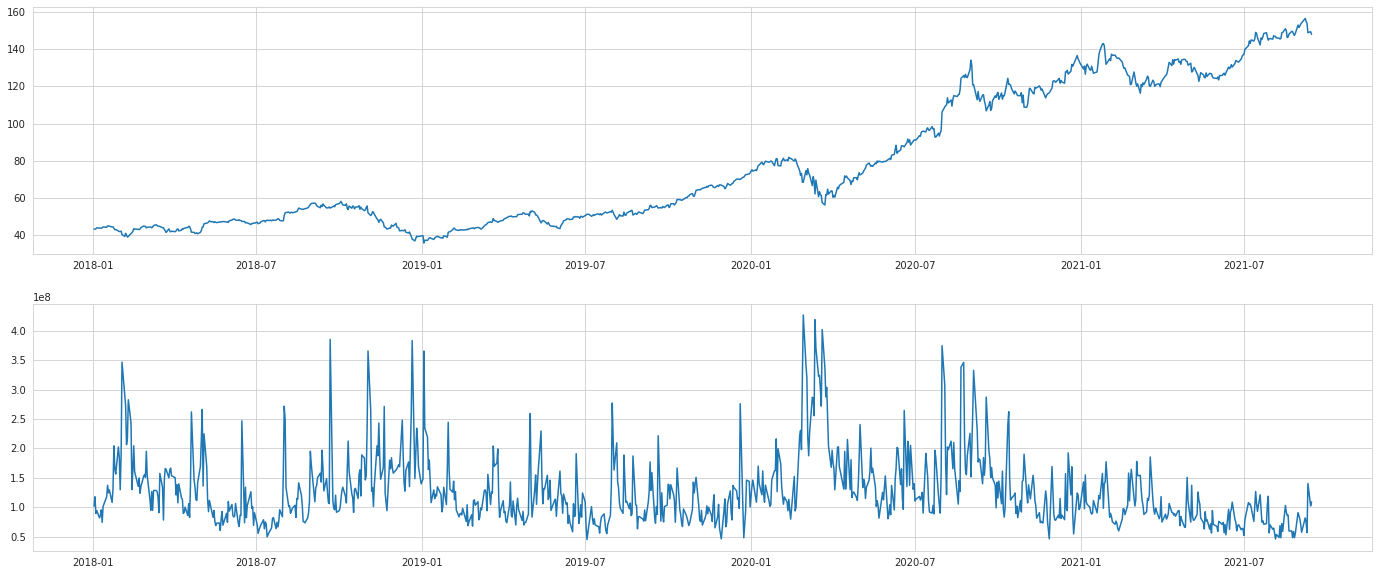

In [ ]:
# Let's see a historical view of the closing price
plt.rc('figure', figsize=(24, 10))

figure, axis = plt.subplots(2, 1)
def historical_view(df):
  axis[0].plot(df.index, df['Close'])
  axis[1].plot(df.index, df['Volume'])

# historical_view(AAPL)
historical_view(filtered_df)

Now that we've seen the DataFrame, let's go ahead and plot out the volume and closing price of the AAPL(Apple) stocks.

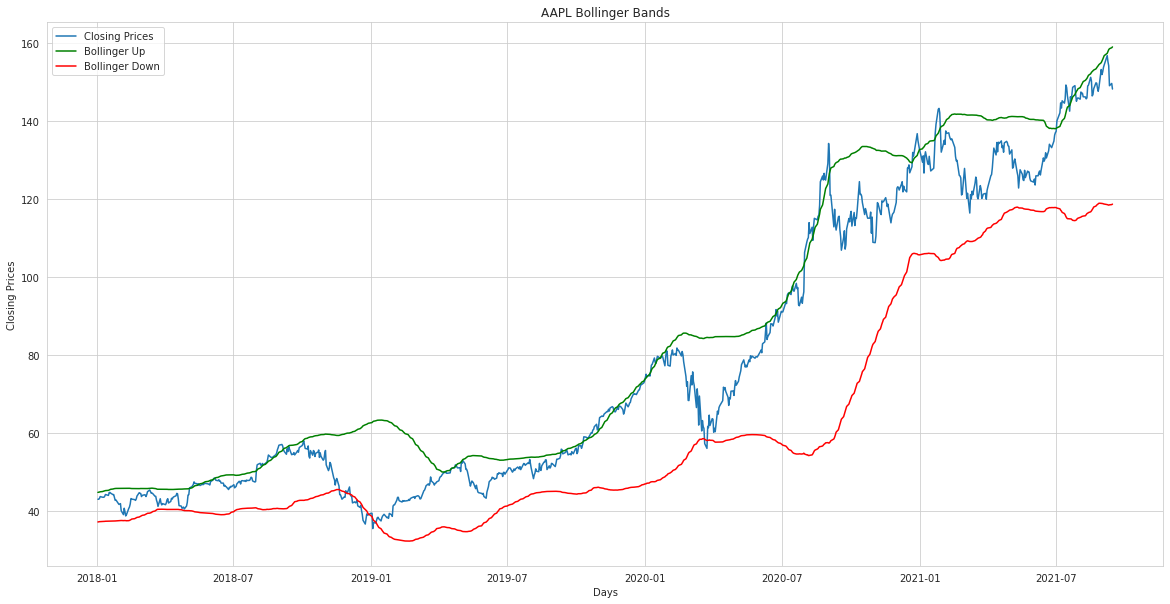

In [ ]:
#visualising bollinger
def plot_bollinger(df):
  plt.rc('figure', figsize=(20, 10))
  plt.title('AAPL Bollinger Bands')
  plt.xlabel('Days')
  plt.ylabel('Closing Prices')
  plt.plot(df['Close'], label='Closing Prices')
  plt.plot(df['Bollinger Up for 100 days'], label='Bollinger Up', c='g')
  plt.plot(df['Bollinger Down for 100 days'], label='Bollinger Down', c='r')
  plt.legend()
  plt.show()

# plot_bollinger(AAPL)
plot_bollinger(filtered_df)

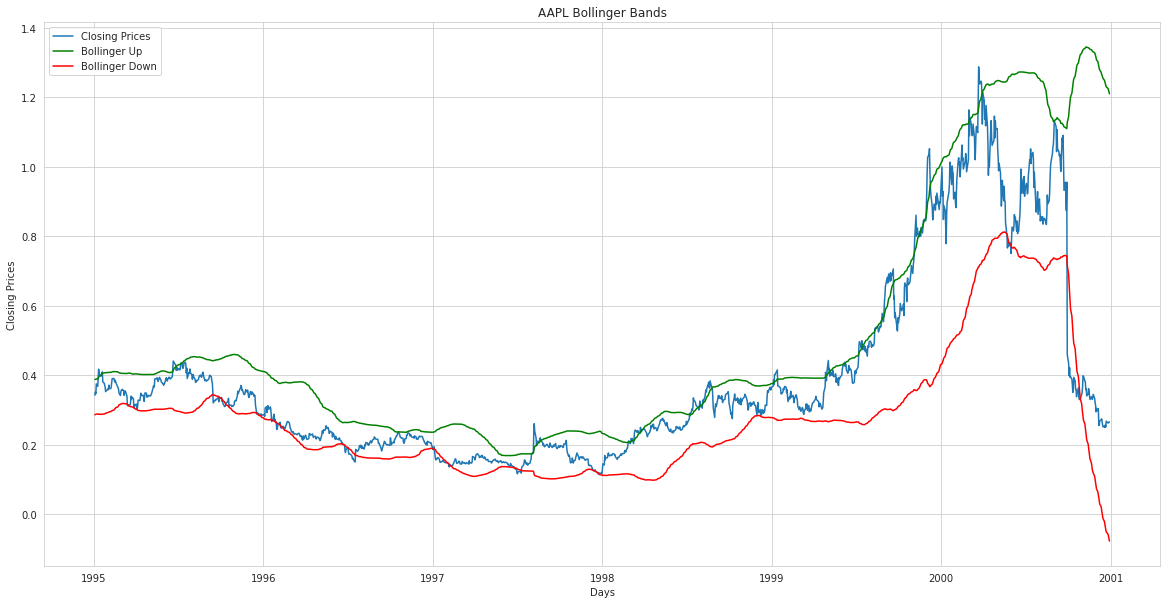

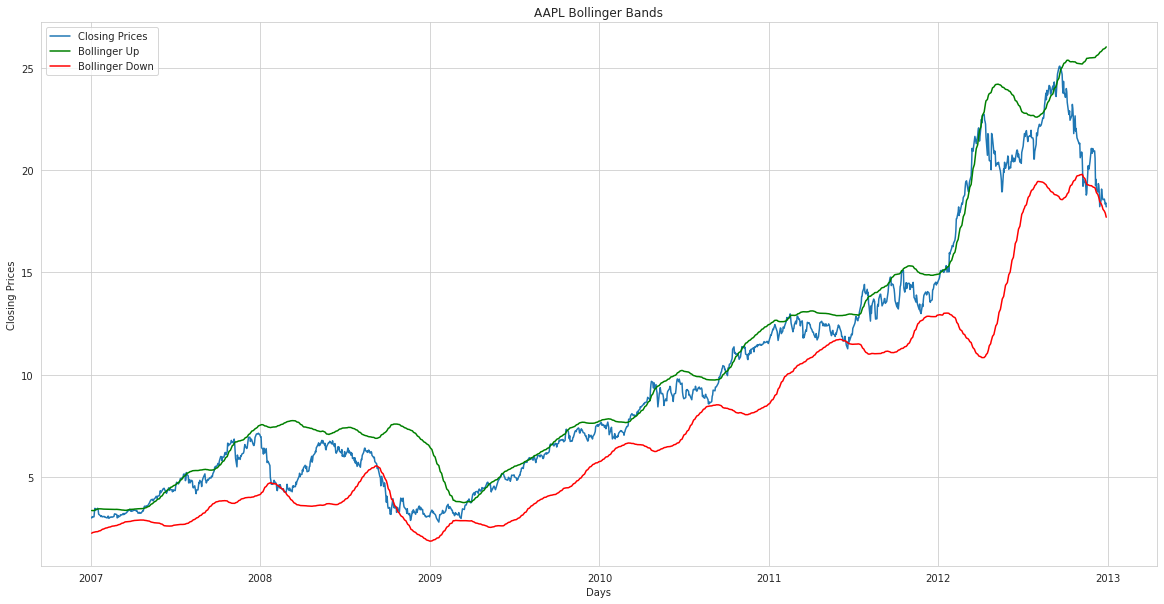

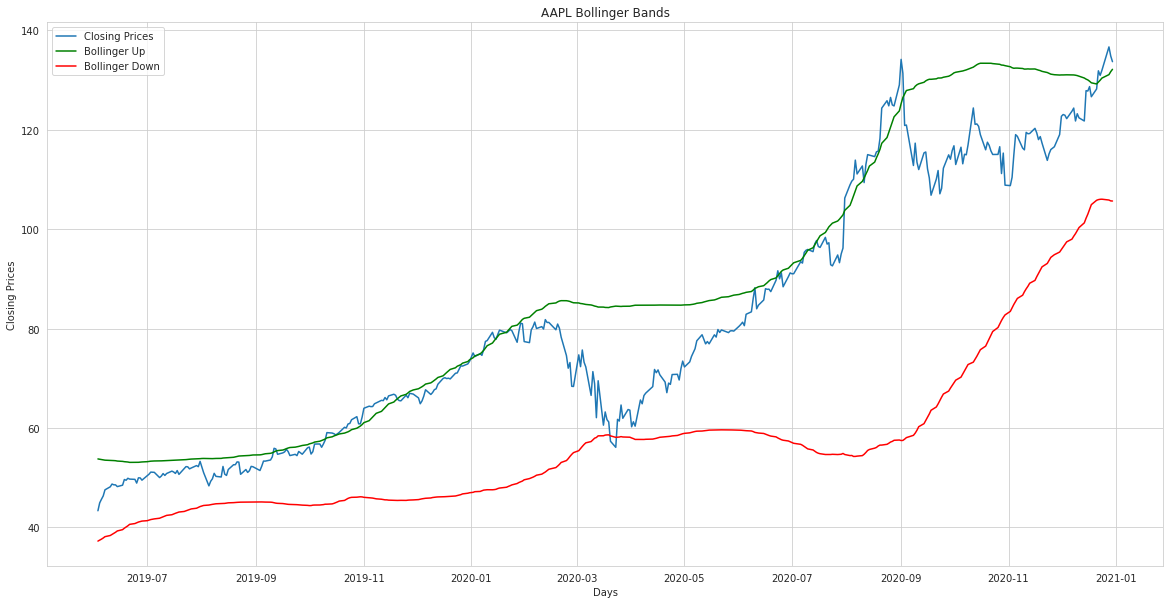

In [ ]:
#BOLLINGER PERIOD WISE PLOTS
plot_bollinger(period_1)
plot_bollinger(period_2)
plot_bollinger(period_3)

Now, lets plot all the additional Moving Averages for AAPL stock

SelectMultiple(index=(1, 3), options=('MA for 20 days', 'MA for 50 days', 'MA for 100 days', 'MA for 200 days'…

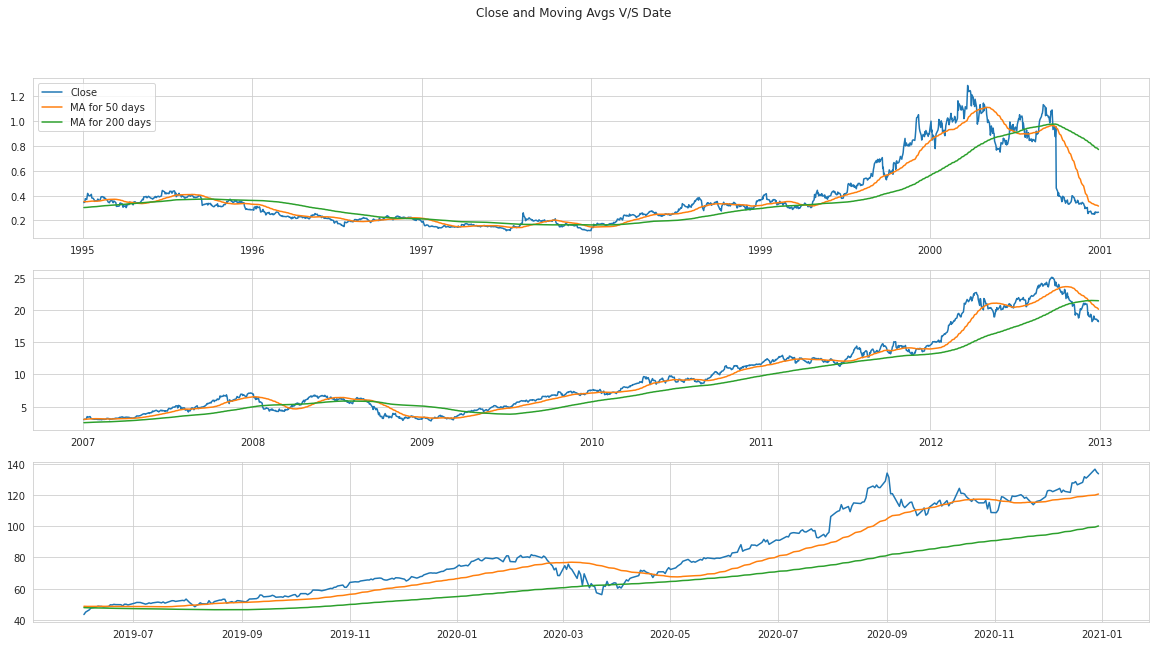

In [ ]:

plot_lines_for = ['MA for 20 days','MA for 50 days','MA for 100 days','MA for 200 days']

dropdown_year = widgets.SelectMultiple(options = plot_lines_for)
def dropdown_year_eventhandler(change):
    print(change.new)
    plot_ma_charts(filtered_df, list(change.new))
dropdown_year.observe(dropdown_year_eventhandler, names='value')


def plot_ma_charts(df, cols=plot_lines_for):
  cols = ['Close'] + cols
  # print(df.columns)
  # plot_lines_for = ['Close','MA for 10 days','MA for 20 days','MA for 50 days','MA for 100 days']
  # df[['Close','MA for 10 days','MA for 20 days','MA for 50 days','MA for 100 days']].plot(subplots=False,figsize=(15,5))
  clear_output()
  display(dropdown_year)
  plt.rc('figure', figsize=(20, 10))
  
  fig, axs = plt.subplots(3)
  fig.suptitle('Close and Moving Avgs V/S Date')
  axs[0].plot(period_1.index, period_1[cols])
  axs[0].legend(cols, loc='upper left')
  axs[1].plot(period_2.index, period_2[cols])
  axs[2].plot(period_3.index, period_3[cols])

  # period_1[cols].plot(subplots=False,figsize=(15,5))
  # period_2[cols].plot(subplots=False,figsize=(15,5))
  # period_3[cols].plot(subplots=False,figsize=(15,5))

  # plt.rc('figure', figsize=(20, 10))
  # ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
  # ax1.plot(df['Close','MA for 10 days','MA for 20 days','MA for 50 days','MA for 100 days'], linewidth = 2.5)

  # ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)
  # ax2.plot(df['Close','MA for 10 days','MA for 20 days','MA for 50 days','MA for 100 days'], linewidth = 2.5)



# plot_ma_charts(AAPL)
plot_ma_charts(filtered_df)

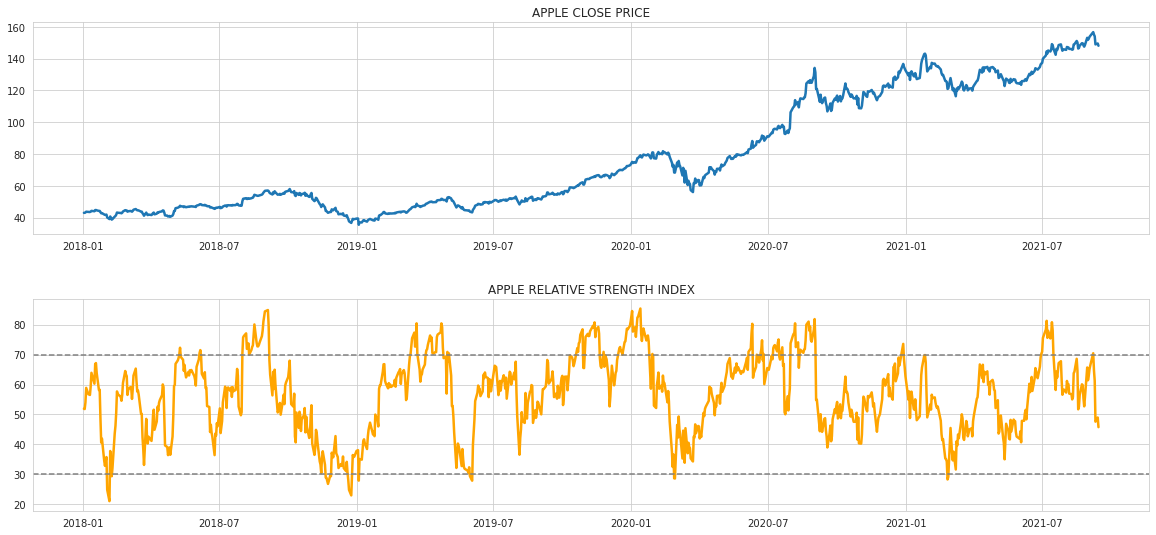

In [ ]:
def plot_rsi(df):
  # df['rsi_14'] = get_rsi(df['Close'], 14)
  df_rsi_14=df['rsi_14'].dropna()
  # AAPL_RSI14
  plt.rc('figure', figsize=(20, 10))
  ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
  ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)
  ax1.plot(df['Close'], linewidth = 2.5)
  ax1.set_title('APPLE CLOSE PRICE')
  ax2.plot(df_rsi_14, color = 'orange', linewidth = 2.5)
  ax2.axhline(30, linestyle = '--', linewidth = 1.5, color = 'grey')
  ax2.axhline(70, linestyle = '--', linewidth = 1.5, color = 'grey')
  ax2.set_title('APPLE RELATIVE STRENGTH INDEX')
  plt.show()

# plot_rsi(AAPL)
plot_rsi(filtered_df)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


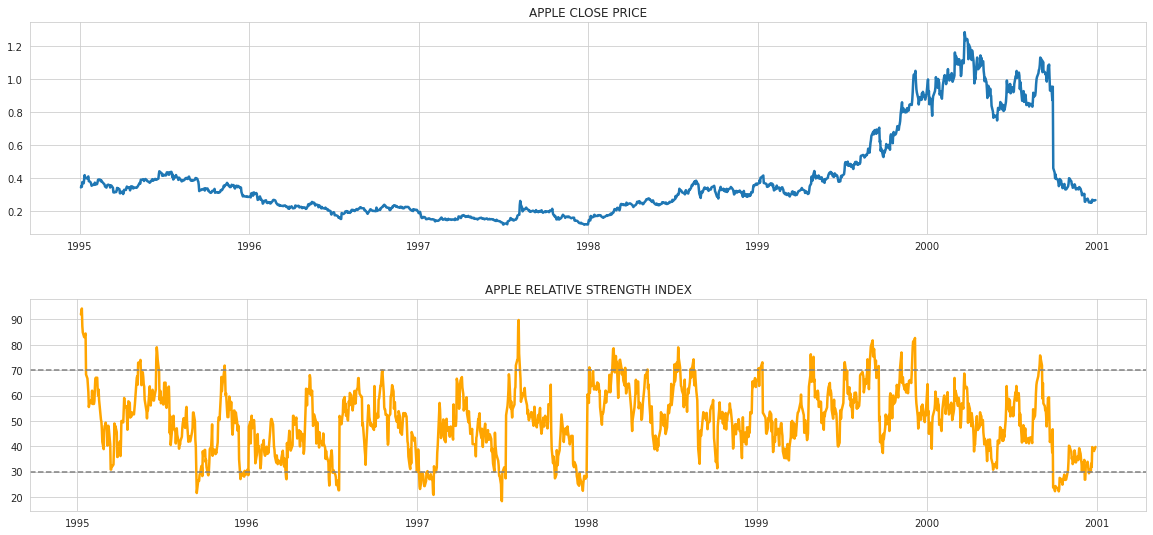

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


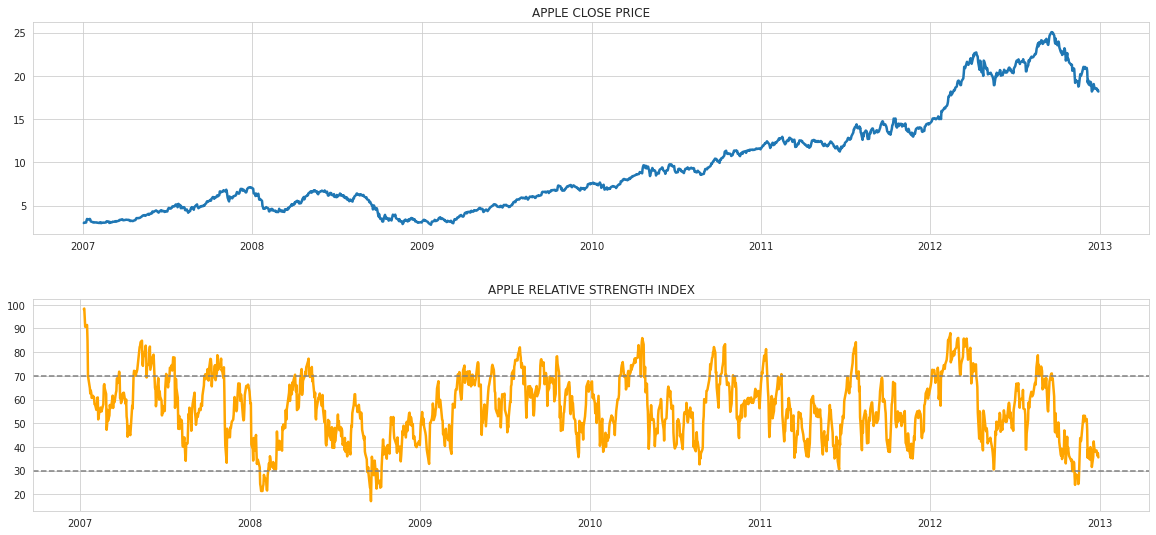

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


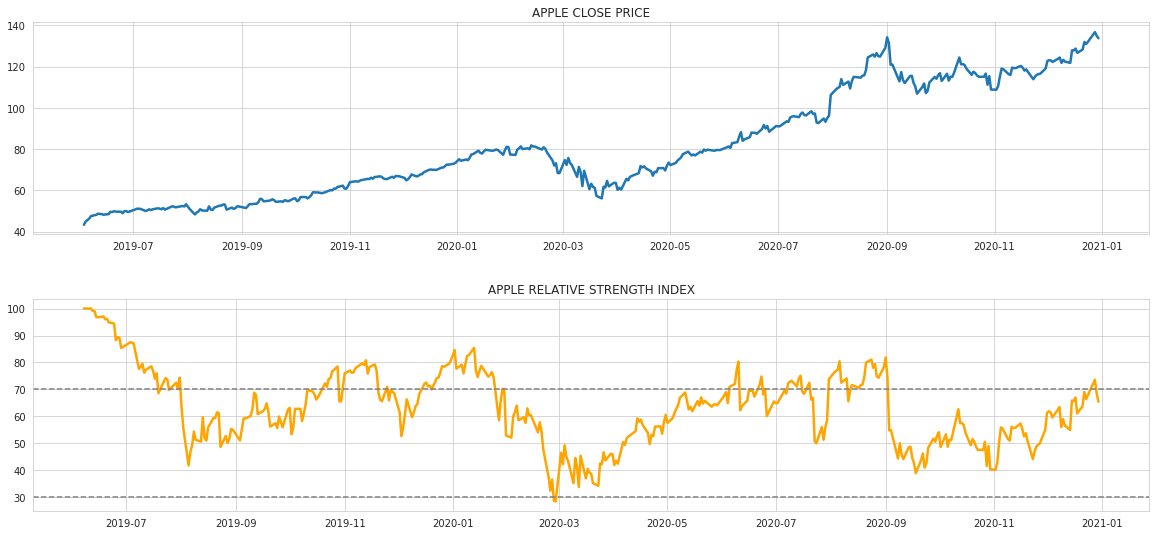

In [ ]:
#RSI PERIOD WISE PLOTS
plot_rsi(period_1)
plot_rsi(period_2)
plot_rsi(period_3)


In [ ]:
#ADX calculation
def get_adx(high, low, close, lookback):
    plus_dm = high.diff()
    minus_dm = low.diff()
    plus_dm[plus_dm < 0] = 0
    minus_dm[minus_dm > 0] = 0
    
    tr1 = pd.DataFrame(high - low)
    tr2 = pd.DataFrame(abs(high - close.shift(1)))
    tr3 = pd.DataFrame(abs(low - close.shift(1)))
    frames = [tr1, tr2, tr3]
    tr = pd.concat(frames, axis = 1, join = 'inner').max(axis = 1)
    atr = tr.rolling(lookback).mean()
    
    plus_di = 100 * (plus_dm.ewm(alpha = 1/lookback).mean() / atr)
    minus_di = abs(100 * (minus_dm.ewm(alpha = 1/lookback).mean() / atr))
    dx = (abs(plus_di - minus_di) / abs(plus_di + minus_di)) * 100
    adx = ((dx.shift(1) * (lookback - 1)) + dx) / lookback
    adx_smooth = adx.ewm(alpha = 1/lookback).mean()
    return plus_di, minus_di, adx_smooth



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

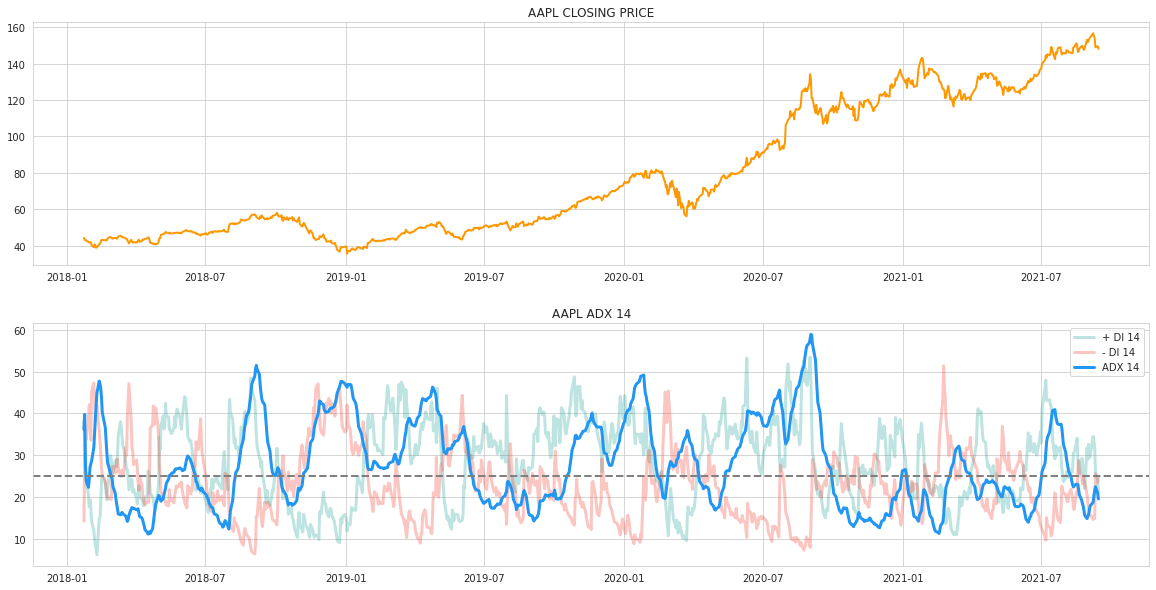

In [ ]:
def plot_adx(df):
  df['plus_di'] = pd.DataFrame(get_adx(df['High'], df['Low'], df['Close'], 14)[0]).rename(columns = {0:'plus_di'})
  df['minus_di'] = pd.DataFrame(get_adx(df['High'], df['Low'], df['Close'], 14)[1]).rename(columns = {0:'minus_di'})
  df['adx'] = pd.DataFrame(get_adx(df['High'], df['Low'], df['Close'], 14)[2]).rename(columns = {0:'adx'})
  AAPL_ADX = df.dropna()
  # AAPL_ADX.tail()
  ax1 = plt.subplot2grid((11,1), (0,0), rowspan = 5, colspan = 1)
  ax2 = plt.subplot2grid((11,1), (6,0), rowspan = 5, colspan = 1)
  ax1.plot(AAPL_ADX['Close'], linewidth = 2, color = '#ff9800')
  ax1.set_title('AAPL CLOSING PRICE')
  ax2.plot(AAPL_ADX['plus_di'], color = '#26a69a', label = '+ DI 14', linewidth = 3, alpha = 0.3)
  ax2.plot(AAPL_ADX['minus_di'], color = '#f44336', label = '- DI 14', linewidth = 3, alpha = 0.3)
  ax2.plot(AAPL_ADX['adx'], color = '#2196f3', label = 'ADX 14', linewidth = 3)
  ax2.axhline(25, color = 'grey', linewidth = 2, linestyle = '--')
  ax2.legend()
  ax2.set_title('AAPL ADX 14')
  plt.show()

plot_adx(filtered_df)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

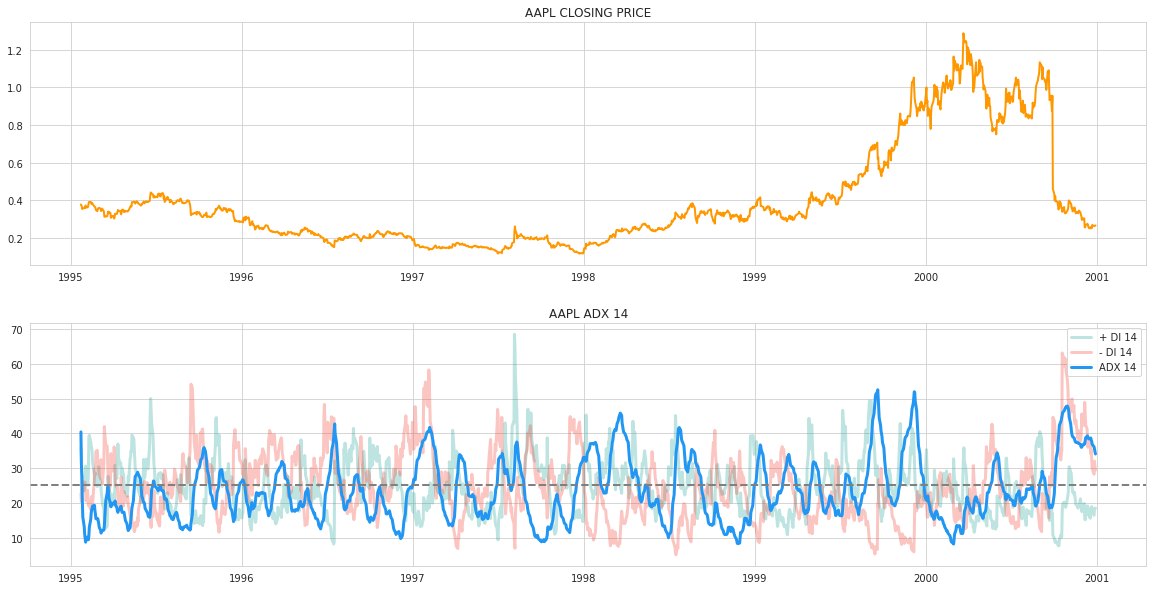

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

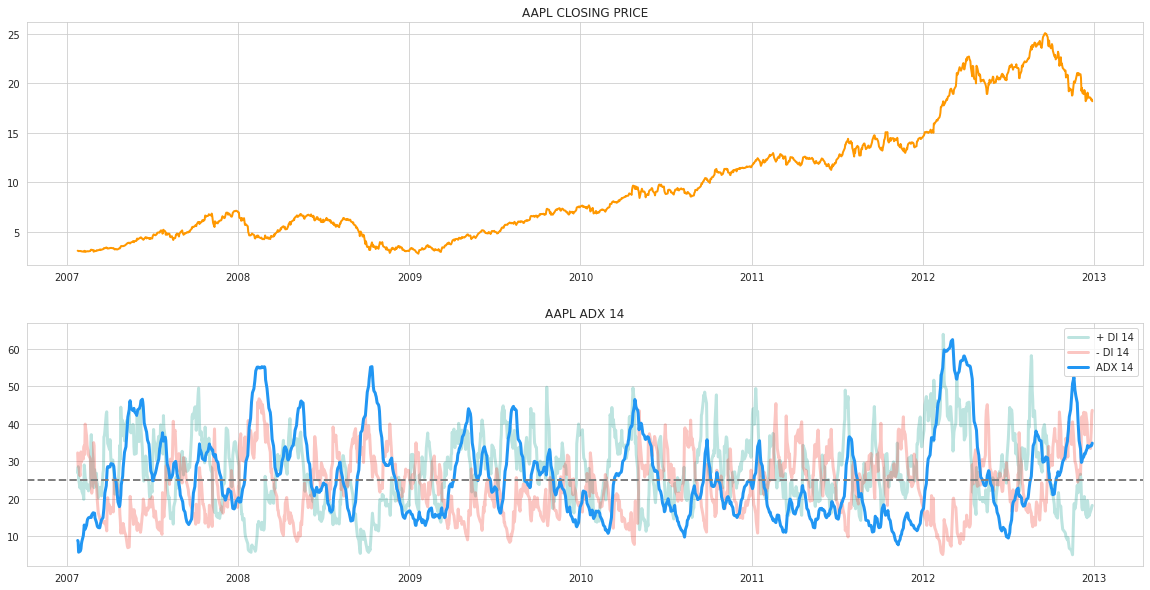

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

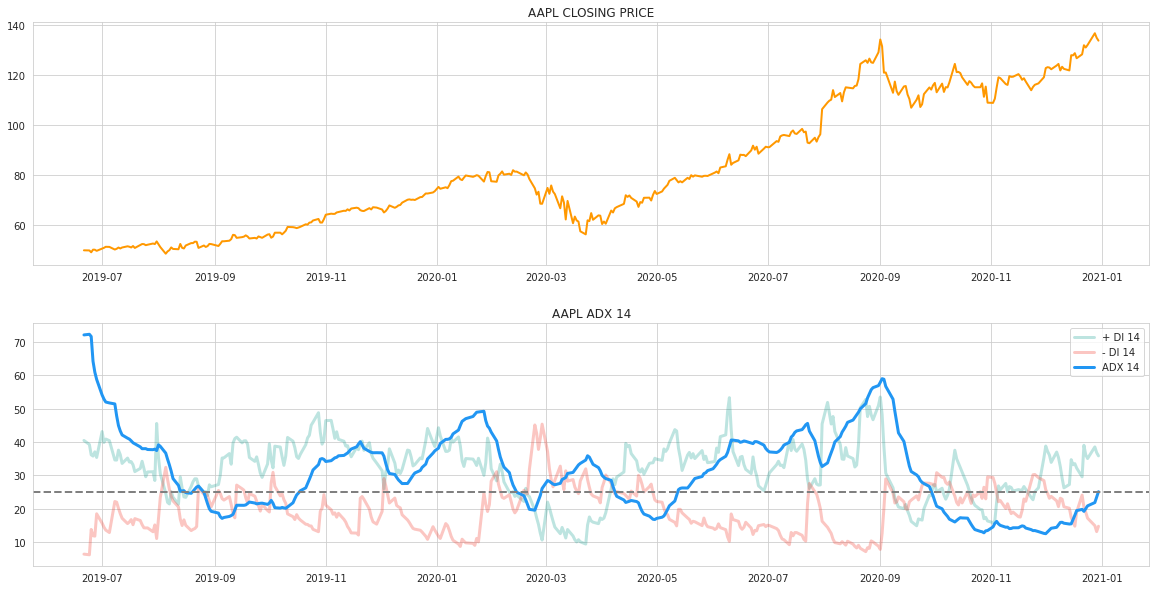

In [ ]:
#ADX PERIOD WISE PLOTS
plot_adx(period_1)
plot_adx(period_2)
plot_adx(period_3)
